In [113]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
import math
import csv
import seaborn as sns
%matplotlib inline

In [114]:
location = 'A'
#location = 'B'
#location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [115]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.362685
11,direct_rad:W,0.358962
13,effective_cloud_cover:p,-0.325929
40,total_cloud_cover:p,-0.280998
41,visibility:m,0.258690
29,relative_humidity_1000hPa:p,-0.209124
38,super_cooled_liquid_water:kgm2,-0.195630
2,ceiling_height_agl:m,0.185124
37,sun_elevation:d,0.182524
5,cloud_base_agl:m,0.178856


In [116]:
location = 'B'
observed = True
if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [117]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
11,direct_rad:W,0.233218
12,direct_rad_1h:J,0.229888
37,sun_elevation:d,0.171454
13,effective_cloud_cover:p,-0.166713
3,clear_sky_energy_1h:J,0.153714
4,clear_sky_rad:W,0.150085
41,visibility:m,0.137576
29,relative_humidity_1000hPa:p,-0.133272
40,total_cloud_cover:p,-0.133161
5,cloud_base_agl:m,0.131772


In [118]:
location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [119]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.288841
11,direct_rad:W,0.285508
13,effective_cloud_cover:p,-0.233356
37,sun_elevation:d,0.215204
4,clear_sky_rad:W,0.210782
3,clear_sky_energy_1h:J,0.209693
41,visibility:m,0.203009
40,total_cloud_cover:p,-0.192287
29,relative_humidity_1000hPa:p,-0.170591
2,ceiling_height_agl:m,0.161959


In [120]:
train_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/train_targets.parquet')
train_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/train_targets.parquet')
train_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_test_estimated.parquet')
X_train_estimated_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_test_estimated.parquet')
X_train_estimated_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_test_estimated.parquet')

X_train_observed_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet')

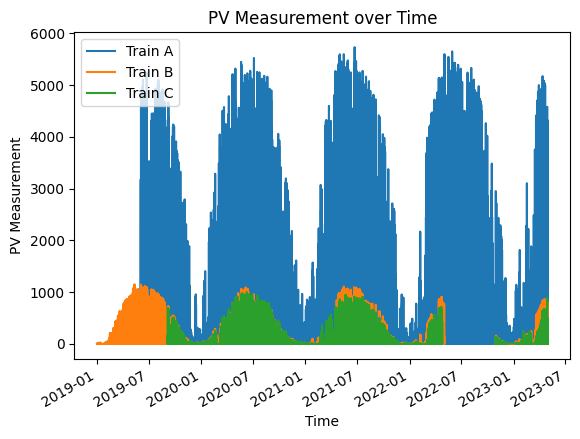

In [121]:
fig, ax = plt.subplots()

train_a.plot(x='time', y='pv_measurement', ax=ax, label='Train A')
train_b.plot(x='time', y='pv_measurement', ax=ax, label='Train B')
train_c.plot(x='time', y='pv_measurement', ax=ax, label='Train C')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.show()

In [123]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [124]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [125]:
X_train_estimated_a.columns

Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_spe

In [168]:
df_corr = X_train_observed_a[X_train_observed_a.columns].dropna().corr()
#df_corr

In [127]:
def plot_corr_heatmap(df):
    
    corr = df_corr

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(15, 10))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
    plt.title(f'Correlation Heatmap')
    plt.show()

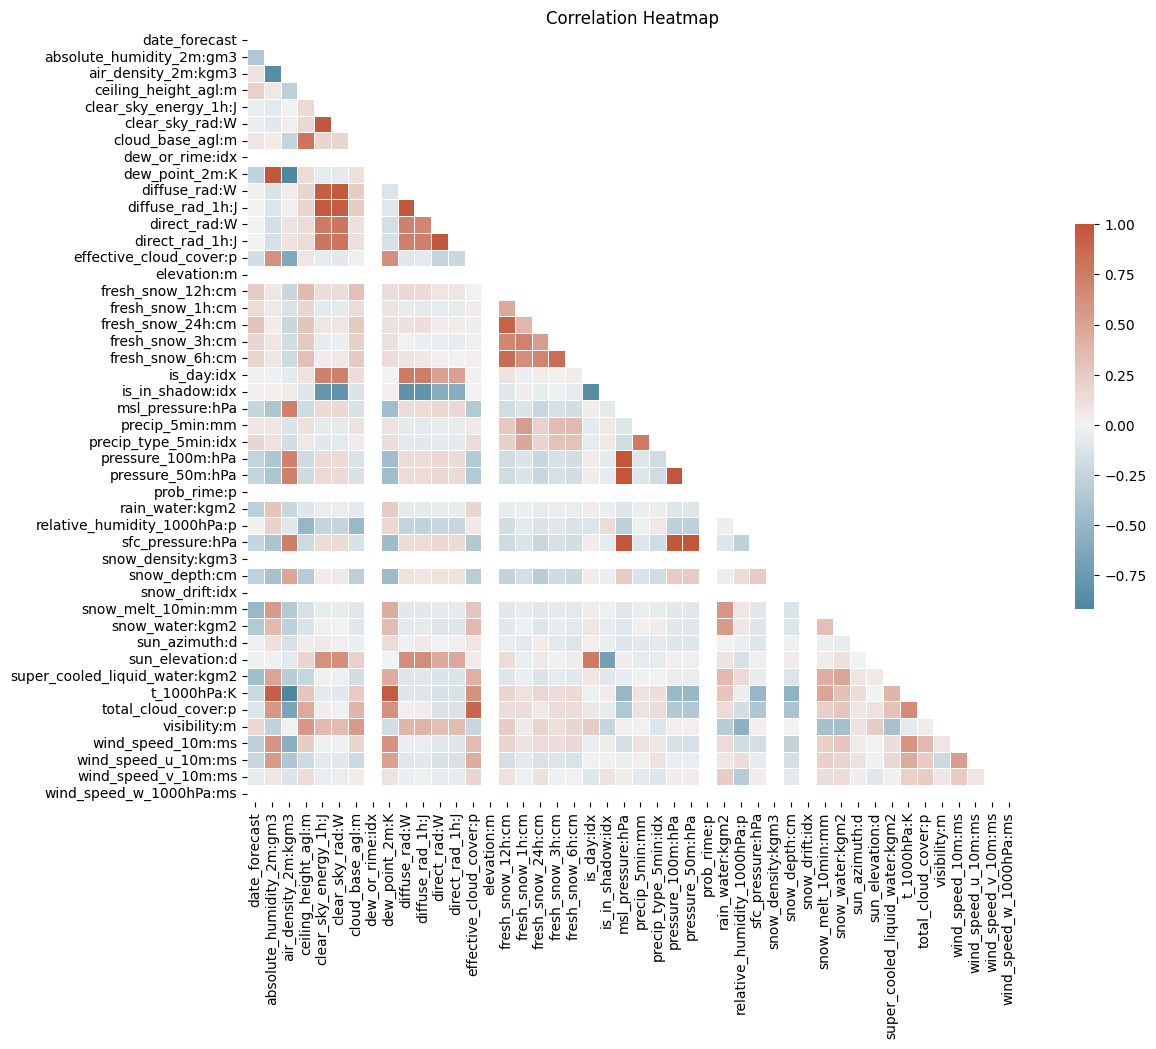

In [128]:
plot_corr_heatmap(X_train_observed_a.columns)

# DATASETS 

Try to make some easy datasets to test on that makes sense

# Y values

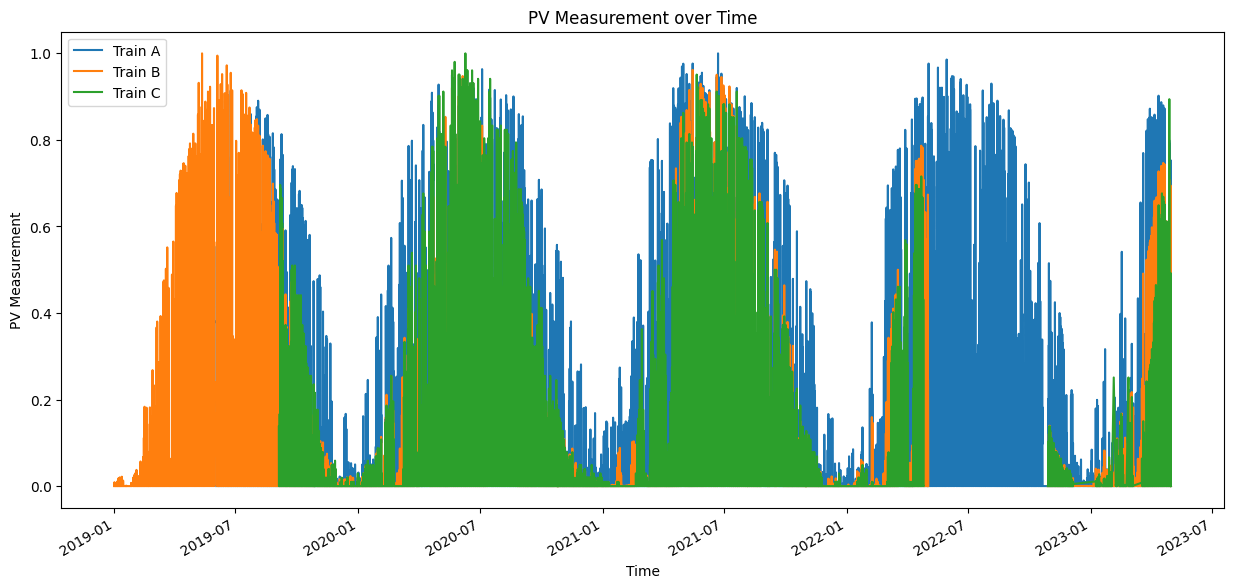

In [129]:
def min_max(data):
    data['pv_measurement'] = (data['pv_measurement'] - data['pv_measurement'].min()) / \
                            (data['pv_measurement'].max() - data['pv_measurement'].min())
    
min_max(train_a)
min_max(train_b)
min_max(train_c)

fig, ax = plt.subplots(figsize=(15,7))

train_a.plot(x='time', y='pv_measurement', ax=ax, label='Train A')
train_b.plot(x='time', y='pv_measurement', ax=ax, label='Train B')
train_c.plot(x='time', y='pv_measurement', ax=ax, label='Train C')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.show()

In [130]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [131]:
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

dfs = [train_a['pv_measurement'], train_b['pv_measurement'], train_c['pv_measurement']]
all_measurements_average = pd.concat(dfs, axis=1, join='outer')

all_measurements_average.dropna(how='all', inplace=True)

all_measurements_average['average_pv_measurement'] = all_measurements_average.mean(axis=1, skipna=True)

average_dataset = all_measurements_average[['average_pv_measurement']].reset_index()


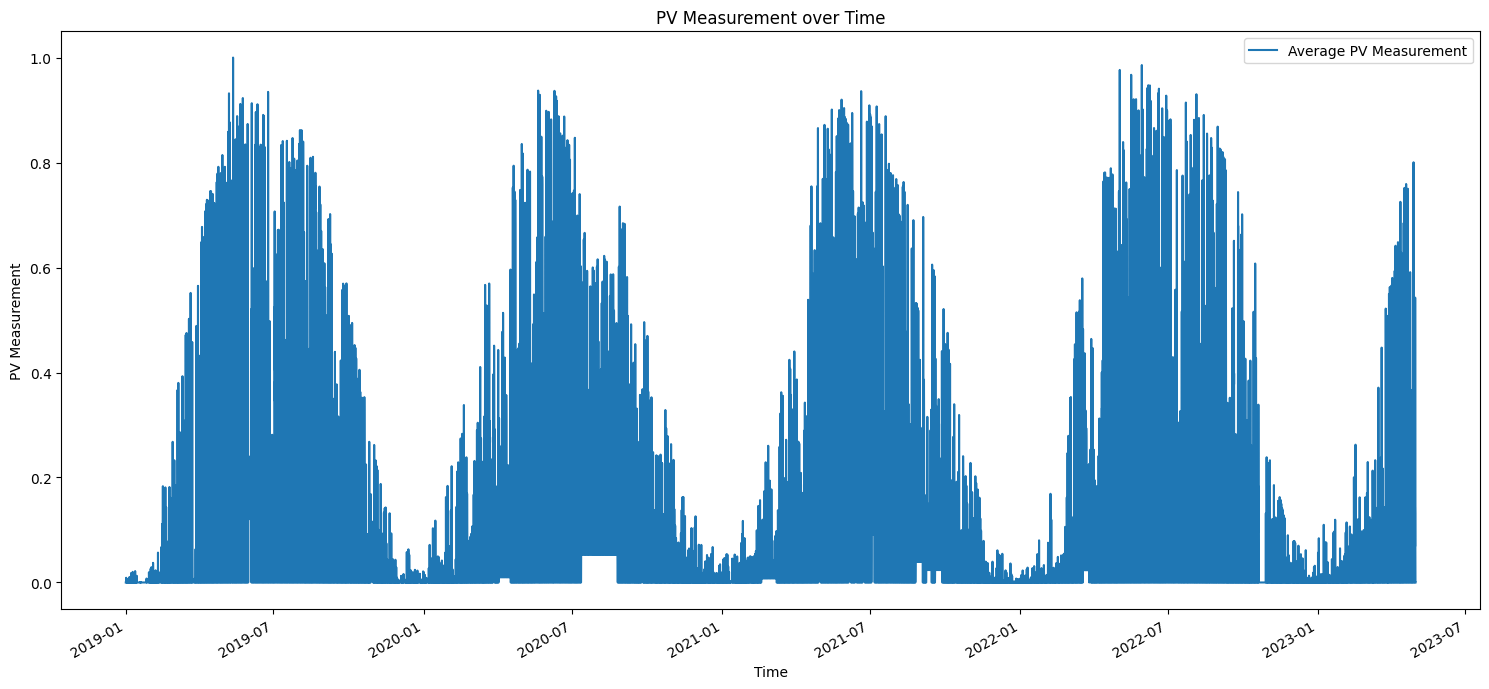

In [132]:
fig, ax = plt.subplots(figsize=(15,7))

average_dataset.plot(x='time', y='average_pv_measurement', ax=ax, label='Average PV Measurement')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.tight_layout()
plt.show()

In [133]:
average_dataset.columns

Index(['time', 'average_pv_measurement'], dtype='object')

So this works ish. Not perfect.  

In [134]:
from IPython.display import display, HTML

# Convert the DataFrames to HTML
df1 = average_dataset.head(5).to_html()
df2 = train_a.head(5).to_html()
df3 = train_b.head(5).to_html()
df4 = train_c.head(5).to_html()

# Combine them using HTML's table structure
display(HTML(
    '<table><tr><td>' + df1 + '</td><td>' + df2 + '</td><td>' + df3 + '</td></tr></table>' + df4 + '</td></tr></table>'
))

It can handle NaN. But we need a way to handle fucked up values somehow. 

Lets try some different methods

Rolling mean

In [135]:
# 1. Compute rolling mean and standard deviation
all_measurements_average['rolling_mean'] = all_measurements_average['average_pv_measurement'].rolling(window=4).mean()
all_measurements_average['rolling_std'] = all_measurements_average['average_pv_measurement'].rolling(window=4).std()

# 2. Create masks for outliers
mask_outliers = (all_measurements_average['average_pv_measurement'] > all_measurements_average['rolling_mean'] + 2*all_measurements_average['rolling_std']) | \
                (all_measurements_average['average_pv_measurement'] < all_measurements_average['rolling_mean'] - 2*all_measurements_average['rolling_std'])

# Option A: Replace outliers with NaN or some other value
#all_measurements.loc[mask_outliers, 'average_pv_measurement'] = np.nan

# Option B: Drop outliers
all_measurements_average = all_measurements_average.loc[~mask_outliers]

# Drop the additional columns (rolling_mean and rolling_std) we added
all_measurements_average.drop(['rolling_mean', 'rolling_std'], axis=1, inplace=True)


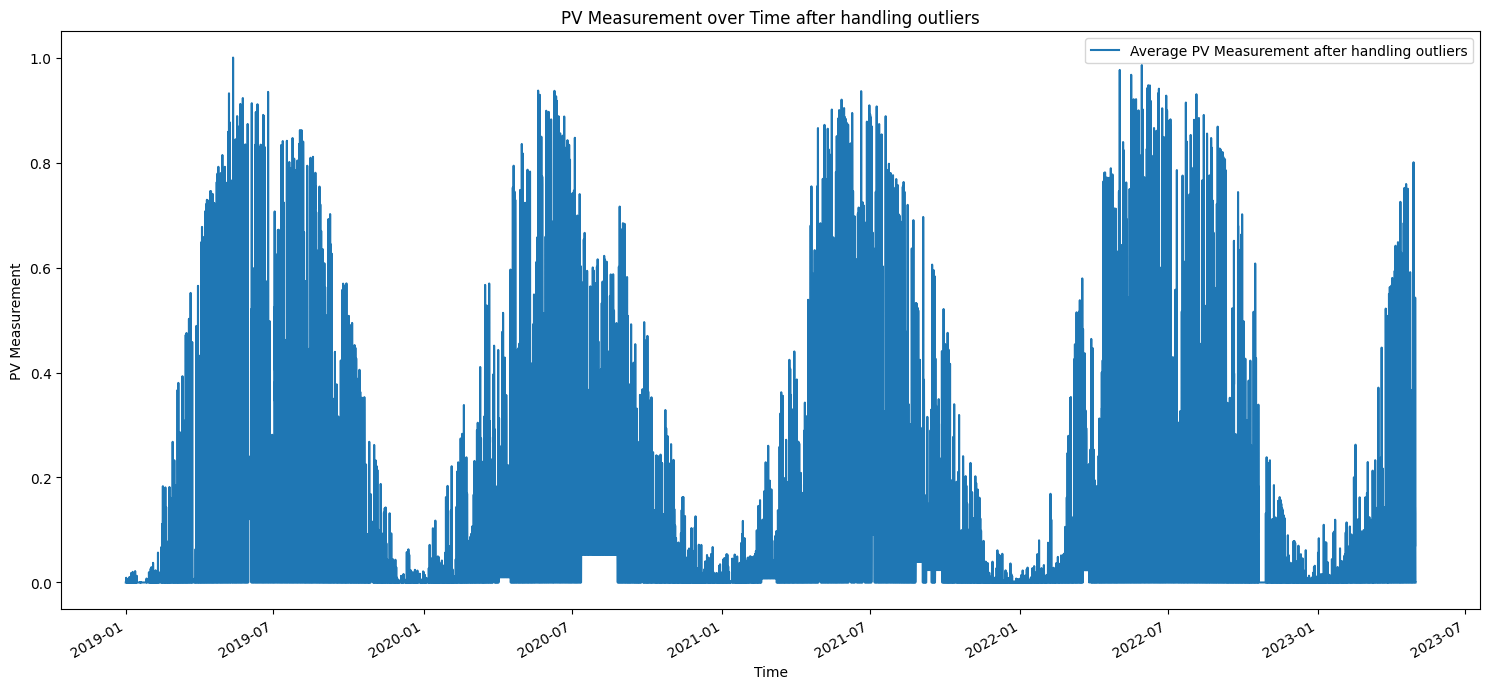

In [136]:
fig, ax = plt.subplots(figsize=(15,7))

# Plot the average PV measurement values
all_measurements_average['average_pv_measurement'].plot(ax=ax, label='Average PV Measurement after handling outliers')

# Highlight outliers if they are replaced by NaN (Optional, remove if not needed)
if all_measurements_average['average_pv_measurement'].isna().any():
    all_measurements_average['average_pv_measurement'].plot(marker='o', linestyle='', color='red', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time after handling outliers')
ax.legend()

plt.tight_layout()
plt.show()


Z-scores

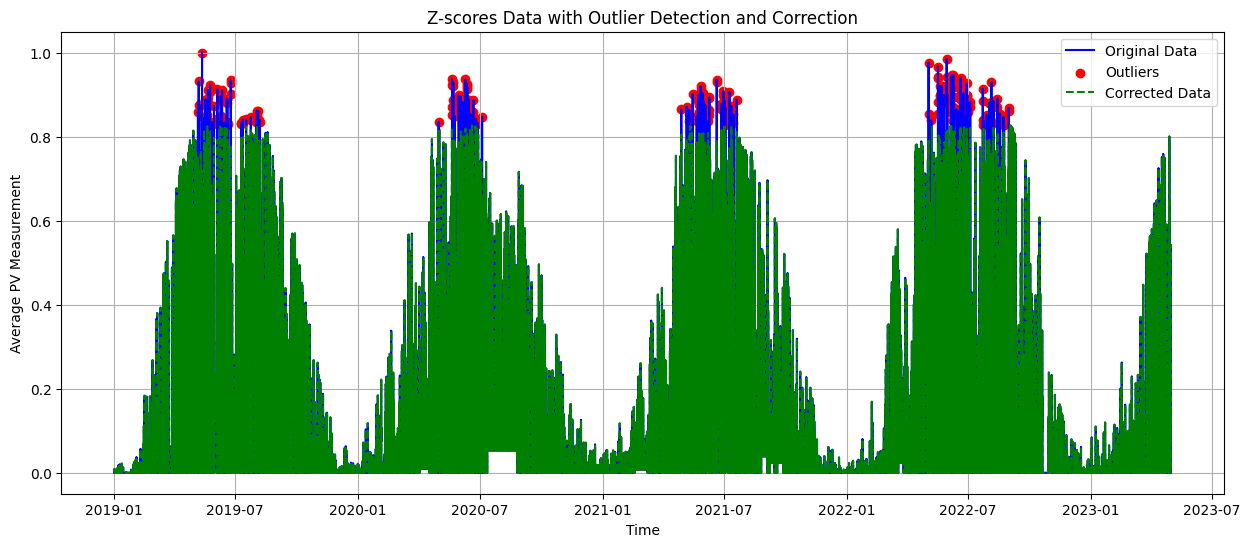

In [137]:
# Using the previously computed average_dataset
from scipy.stats import zscore
# 1. Create a copy of the average_dataset to not change its original content
z_scores_data = average_dataset.copy()

# 2. Calculate Z-scores
z_scores_data['z_scores'] = zscore(z_scores_data['average_pv_measurement'])

# 3. Identify outliers
threshold = 4
outliers = (z_scores_data['z_scores'] > threshold) | (z_scores_data['z_scores'] < -threshold)

# Plot original data
plt.figure(figsize=(15,6))
plt.plot(z_scores_data['time'], z_scores_data['average_pv_measurement'], label='Original Data', color='blue')

# Highlight outliers
plt.scatter(z_scores_data['time'][outliers], z_scores_data['average_pv_measurement'][outliers], color='red', label='Outliers')

# 4. Substitute outliers with approximations
median_value = z_scores_data.loc[~outliers, 'average_pv_measurement'].median()
z_scores_data.loc[outliers, 'average_pv_measurement'] = median_value

# Plot corrected data
plt.plot(z_scores_data['time'], z_scores_data['average_pv_measurement'], label='Corrected Data', color='green', linestyle='--')

plt.legend()
plt.title("Z-scores Data with Outlier Detection and Correction")
plt.xlabel("Time")
plt.ylabel("Average PV Measurement")
plt.grid(True)
plt.show()

Isolation Forest

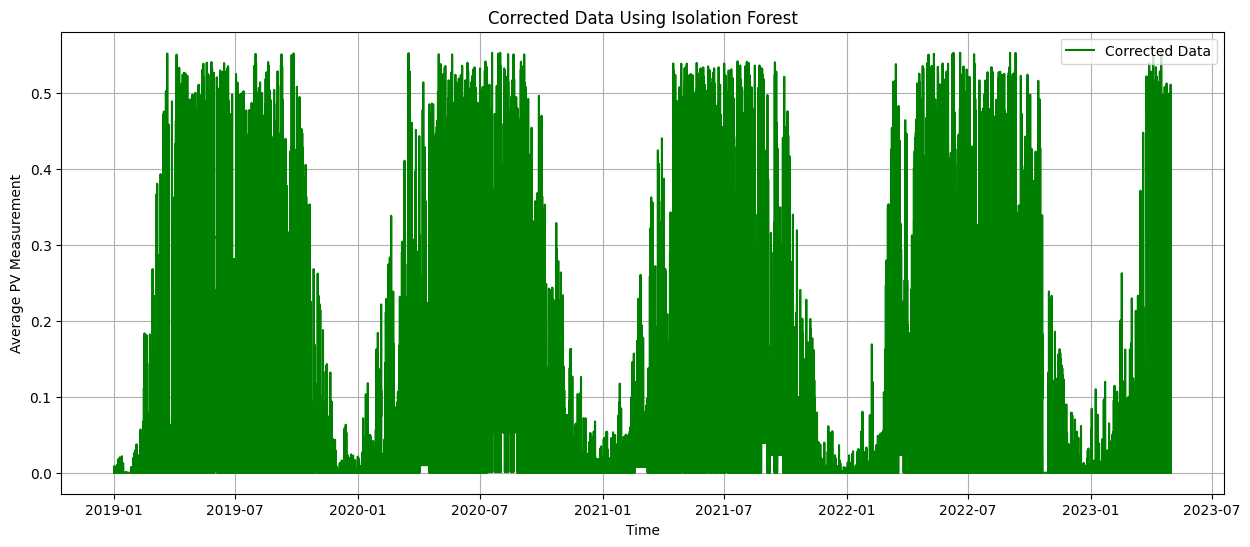

In [138]:
from sklearn.ensemble import IsolationForest

# Create a copy of the average_dataset to not change its original content
forest_corrected_data = average_dataset.copy()

# Using the IsolationForest to identify outliers
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(forest_corrected_data[['average_pv_measurement']]) == -1

# Substitute outliers with approximations
median_value = forest_corrected_data.loc[~outliers, 'average_pv_measurement'].median()
forest_corrected_data.loc[outliers, 'average_pv_measurement'] = median_value

# Plot corrected data
plt.figure(figsize=(15,6))
plt.plot(forest_corrected_data['time'], forest_corrected_data['average_pv_measurement'], label='Corrected Data', color='green')

plt.legend()
plt.title("Corrected Data Using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Average PV Measurement")
plt.grid(True)
plt.show()


Split the 'date' column, which is in datetime64[us] to several columns

In [139]:
average_dataset.columns

Index(['time', 'average_pv_measurement'], dtype='object')

In [140]:
# Create a copy of the average_dataset to not change its original content
average_dataset_copy = average_dataset.copy()

# Ensure 'time' is the index
average_dataset_copy.set_index('time', inplace=True)

# Extract the features from the 'time' index
#average_dataset_copy['day_of_week'] = average_dataset_copy.index.dayofweek  # Monday=0, Sunday=6
#average_dataset_copy['week_of_year'] = average_dataset_copy.index.isocalendar().week
#average_dataset_copy['hour_of_day'] = average_dataset_copy.index.hour
#average_dataset_copy['month'] = average_dataset_copy.index.month

# If you want to reset the index
average_dataset_copy.reset_index(drop=True, inplace=True)

# Display the first few rows of the modified dataframe
average_dataset_copy.head()


,average_pv_measurement
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Maybe just the average after alle, but probably better if we tweek it a little bit

# X values 

Lets do some shit with the X-values, and make a dataset we can train on

Split date format to seperat columns; date, month, time, year. Then the modell will itself figure out patterns in hours and months (day vs night, summer vs winter etc)

Hard to see patterns in strings. 

Normalization: All data should be in the same scale. Use MinMax scaling or zScore. 

Kategoriske variabler: One hot encoding - en feature for hver måned, år, dag, time. 

Singular value decomposition - demonsionality reduction. 

In [141]:
df_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet')
df_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet')
df_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet')

# Ensure date_forecast is set as the index for all datasets
df_a.set_index('date_forecast', inplace=True)
df_b.set_index('date_forecast', inplace=True)
df_c.set_index('date_forecast', inplace=True)

# Sum datasets together
sum_df = df_a.add(df_b, fill_value=0).add(df_c, fill_value=0)

# Create a mask for non-NaN values for each dataset
mask_a = df_a.notna().astype(int)
mask_b = df_b.notna().astype(int)
mask_c = df_c.notna().astype(int)

# Calculate the number of non-NaN values for each cell
count_non_nan = mask_a.add(mask_b, fill_value=0).add(mask_c, fill_value=0)

# Avoid division by zero and compute the average
average_df = sum_df.divide(count_non_nan, fill_value=0)

# Filter out rows that aren't on full hours
average_df = average_df[average_df.index.minute == 0]

# If you want only those hours that are :00:00
average_df = average_df[average_df.index.second == 0]

# Extract features from the date_forecast index
average_df['day_of_week'] = average_df.index.dayofweek  # Monday=0, Sunday=6
average_df['week_of_year'] = average_df.index.isocalendar().week
average_df['hour_of_day'] = average_df.index.hour
average_df['month'] = average_df.index.month

average_df.reset_index(drop=True, inplace=True)

average_df.head(5)   

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,day_of_week,week_of_year,hour_of_day,month
0,5.60,1.2395,1190.000000,0.0,0.0,1190.000000,0.5,275.299988,0.0,0.0,...,71.199997,18748.150391,2.50,1.10,2.20,0.0,1,1,0,1
1,5.35,1.2410,1124.099976,0.0,0.0,1124.099976,0.5,274.600006,0.0,0.0,...,99.400002,13207.299805,3.45,1.25,3.20,0.0,1,1,1,1
2,5.45,1.2380,1057.099976,0.0,0.0,1057.099976,0.0,274.950012,0.0,0.0,...,98.400002,12727.750000,3.85,1.90,3.35,0.0,1,1,2,1
3,5.25,1.2400,989.050049,0.0,0.0,989.050049,0.0,274.350006,0.0,0.0,...,97.500000,8575.750000,4.20,2.20,3.55,0.0,1,1,3,1
4,5.45,1.2390,991.950012,0.0,0.0,991.950012,0.0,274.950012,0.0,0.0,...,97.250000,4185.299805,5.70,4.75,3.10,0.0,1,1,4,1


# With this, try some predictions

In [142]:
average_dataset.columns

Index(['time', 'average_pv_measurement'], dtype='object')

In [143]:
x_train = average_df.dropna()
y_train = average_dataset_copy

In [144]:
x_train.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10

In [145]:
x_train.dtypes

absolute_humidity_2m:gm3          float64
air_density_2m:kgm3               float64
ceiling_height_agl:m              float64
clear_sky_energy_1h:J             float64
clear_sky_rad:W                   float64
cloud_base_agl:m                  float64
dew_or_rime:idx                   float64
dew_point_2m:K                    float64
diffuse_rad:W                     float64
diffuse_rad_1h:J                  float64
direct_rad:W                      float64
direct_rad_1h:J                   float64
effective_cloud_cover:p           float64
elevation:m                       float64
fresh_snow_12h:cm                 float64
fresh_snow_1h:cm                  float64
fresh_snow_24h:cm                 float64
fresh_snow_3h:cm                  float64
fresh_snow_6h:cm                  float64
is_day:idx                        float64
is_in_shadow:idx                  float64
msl_pressure:hPa                  float64
precip_5min:mm                    float64
precip_type_5min:idx              

In [146]:
y_train.dtypes

average_pv_measurement    float64
dtype: object

In [147]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [148]:
print(type(x_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [149]:
y_train = y_train.iloc[:, 0]

In [150]:
#dtrain = xgb.DMatrix(x_train, label=y_train)

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
# from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.metrics import mean_squared_error

In [152]:
print(x_train.shape)
print(y_train.shape)

(1971, 49)
(37755,)


In [153]:
y_train_trimmed = y_train.loc[x_train.index]
print(y_train_trimmed.shape)

(1971,)


# Check x - values for missing values in the most important features

Researching the most valuable features:

direct_rad:W	0.233218 

direct_rad_1h:J	0.229888

sun_elevation:d	0.171454

effective_cloud_cover:p	-0.166713

clear_sky_energy_1h:J	0.153714

clear_sky_rad:W	0.150085

visibility:m	0.137576

relative_humidity_1000hPa:p	-0.133272

total_cloud_cover:p	-0.133161

cloud_base_agl:m	0.131772

![Alt text](image.png)

In [167]:
# Load datasets
datasets = {
    "X_train_estimated_a": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_estimated.parquet'),
    "X_train_estimated_b": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_estimated.parquet'),
    "X_train_estimated_c": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_estimated.parquet'),
    "X_train_observed_a": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet'),
    "X_train_observed_b": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet'),
    "X_train_observed_c": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet'),
    "X_test_estimated_a": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_test_estimated.parquet'),
    "X_test_estimated_b": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_test_estimated.parquet'),
    "X_test_estimated_c": pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_test_estimated.parquet')
}

# Check NaN values
for dataset_name, dataset in datasets.items():
    print(f"Checking NaN values in {dataset_name}:")
    
    # Assuming the first column is named 'date'. If not, adjust the name accordingly.
    features = dataset.columns[1:]
    
    for feature in features:
        nan_count = dataset[feature].isna().sum()
        
        if nan_count > 0:
            print(f"  - Number of NaN values in {feature}: {nan_count}")
    
    print("\n")


Checking NaN values in X_train_estimated_a:
  - Number of NaN values in ceiling_height_agl:m: 3919
  - Number of NaN values in cloud_base_agl:m: 2094
  - Number of NaN values in snow_density:kgm3: 15769


Checking NaN values in X_train_estimated_b:
  - Number of NaN values in ceiling_height_agl:m: 3689
  - Number of NaN values in cloud_base_agl:m: 1963
  - Number of NaN values in snow_density:kgm3: 15713


Checking NaN values in X_train_estimated_c:
  - Number of NaN values in ceiling_height_agl:m: 4596
  - Number of NaN values in cloud_base_agl:m: 2804
  - Number of NaN values in snow_density:kgm3: 13898


Checking NaN values in X_train_observed_a:
  - Number of NaN values in ceiling_height_agl:m: 22247
  - Number of NaN values in cloud_base_agl:m: 8066
  - Number of NaN values in snow_density:kgm3: 115945


Checking NaN values in X_train_observed_b:
  - Number of NaN values in ceiling_height_agl:m: 18772
  - Number of NaN values in cloud_base_agl:m: 7473
  - Number of NaN values in s

**Conclusion**

The only x-values with NaN values are:

ceiling_height_agl:m

cloud_base_agl:m

snow_density:kgm3

Only usable of these are ceiling height


In [177]:
# First, filter out the NaN values in the 'pv_measurement' column for each dataframe

train_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/train_targets.parquet')
train_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/train_targets.parquet')
train_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/train_targets.parquet')

train_a_filtered = train_a[train_a['pv_measurement'].notna()]
train_b_filtered = train_b[train_b['pv_measurement'].notna()]
train_c_filtered = train_c[train_c['pv_measurement'].notna()]

# Now, you might need to make sure that the dataframes are aligned (i.e., referring to the same timestamps)
# If the datasets have a common timestamp column (e.g., 'date'), you can merge them on that
merged_data = pd.merge(train_a_filtered[['time', 'pv_measurement']], train_b_filtered[['time', 'pv_measurement']], on='time', suffixes=('_a', '_b'))
merged_data = pd.merge(merged_data, train_c_filtered[['time', 'pv_measurement']], on='time')
merged_data.rename(columns={'pv_measurement': 'pv_measurement_c'}, inplace=True)

# Now compute the correlation
correlation_matrix = merged_data[['pv_measurement_a', 'pv_measurement_b', 'pv_measurement_c']].corr()

print(correlation_matrix)


                  pv_measurement_a  pv_measurement_b  pv_measurement_c
pv_measurement_a          1.000000          0.847118          0.911823
pv_measurement_b          0.847118          1.000000          0.872523
pv_measurement_c          0.911823          0.872523          1.000000


In [178]:
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Filter the data for the given date range
date_filtered_data = merged_data.loc[(merged_data['time'] >= '2019-12-01') & (merged_data['time'] <= '2020-02-15')]

# Now compute the correlation for the filtered data
correlation_matrix_date_filtered = date_filtered_data[['pv_measurement_a', 'pv_measurement_b', 'pv_measurement_c']].corr()

print(correlation_matrix_date_filtered)


                  pv_measurement_a  pv_measurement_b  pv_measurement_c
pv_measurement_a          1.000000          0.847299          0.789742
pv_measurement_b          0.847299          1.000000          0.880401
pv_measurement_c          0.789742          0.880401          1.000000


In [179]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [180]:
train_a.dtypes

time              datetime64[us]
pv_measurement           float64
dtype: object